# ObesityData_Analysis（肥胖数据集数据分析以及随机森林回归算法模型）

In [1]:
#导入需要的模块
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #Seaborn是基于matplotlib的图形可视化python包
import plotly.offline as py
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
import os

In [2]:
filepath='Obesity-DataSet/Obesity-DataSet.csv'
df = pd.read_csv(filepath, encoding='ISO-8859-2')
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.describe()
# df的统计变量

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


<AxesSubplot:ylabel='None'>

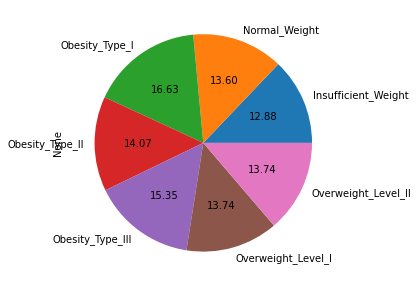

In [4]:
plt.figure(figsize=(5,5))#y is none
df.groupby('NObeyesdad').size().plot(kind='pie', autopct='%.2f')

###### 首先统计各个肥胖程度人数占比，可以发现数据集各属性人数较平均  
###### 由此可推断数据集可能比较合理

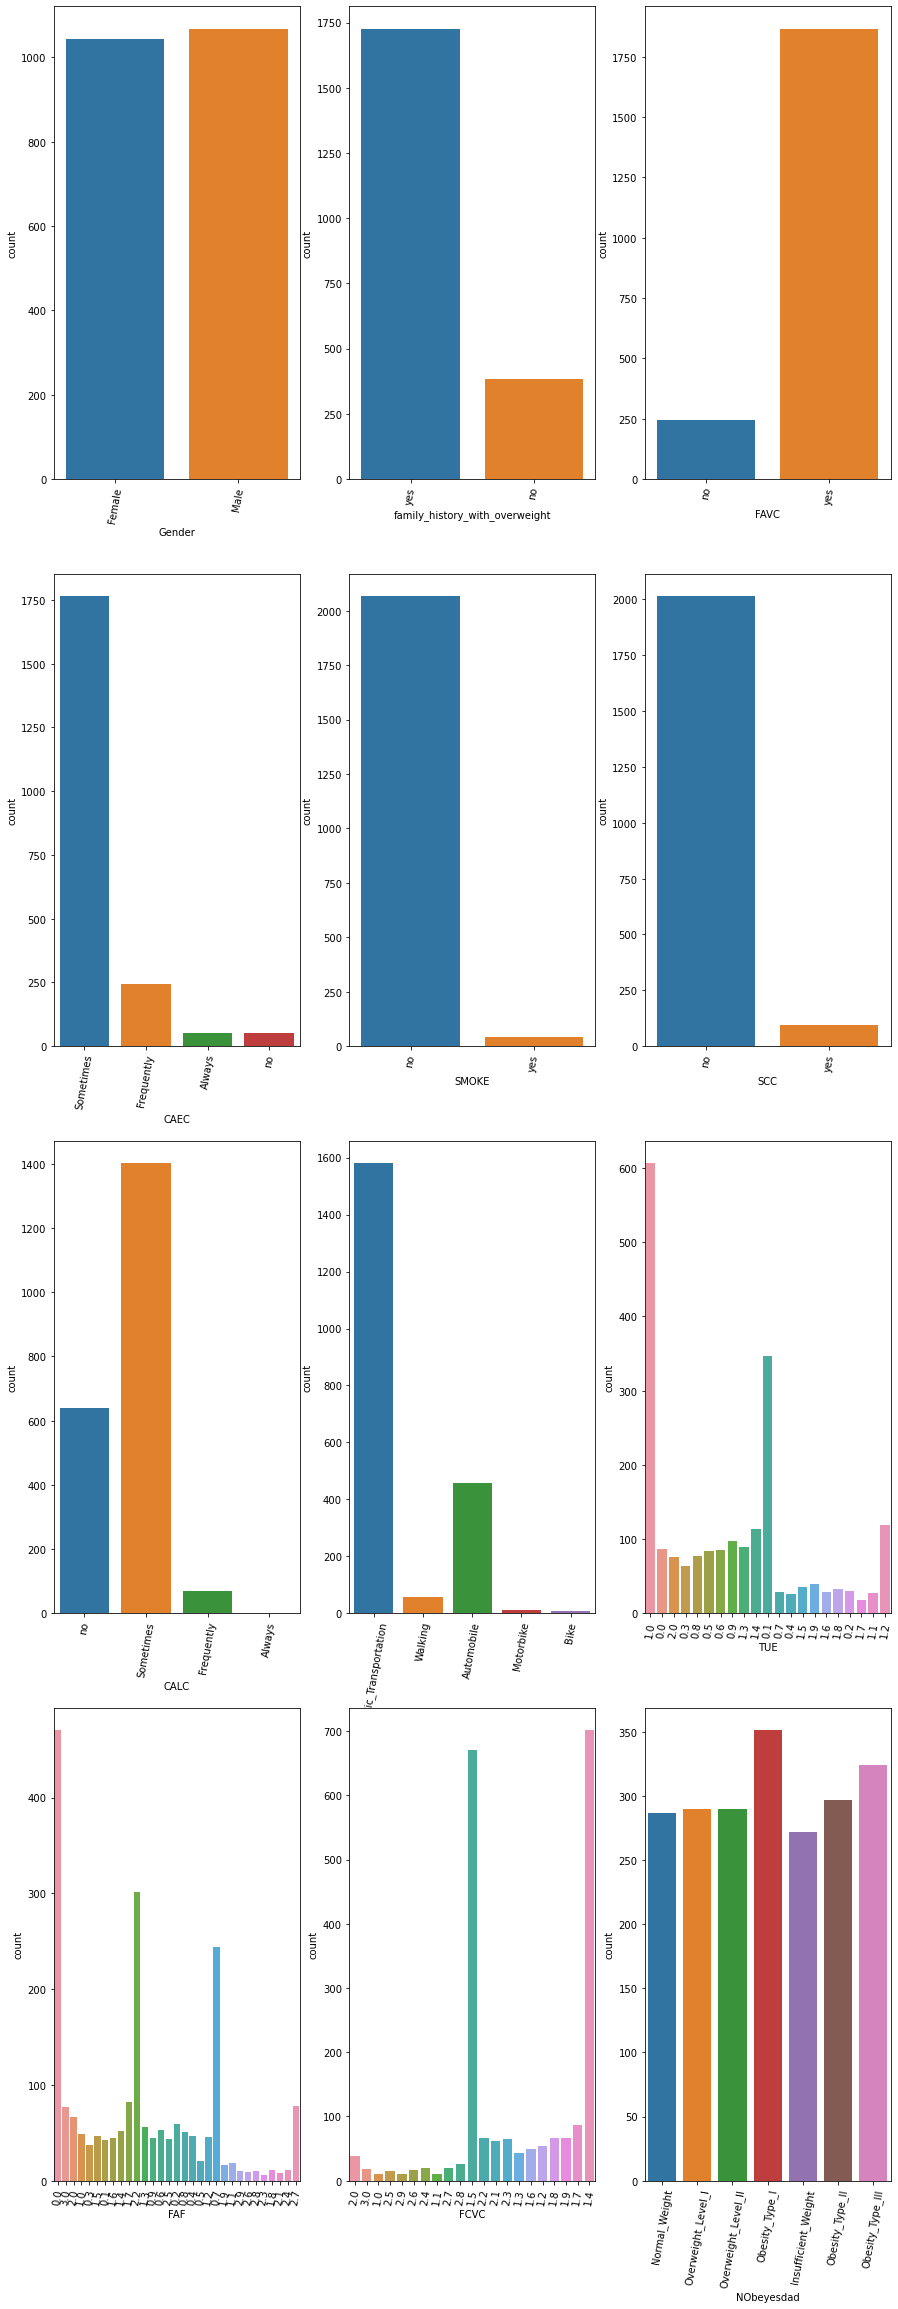

In [5]:
# 先处理一下FAF,TUE,FAVC三个列标签的值将多结果聚合成小数据范围内
# 随后将所有标签的不同属性人数进行统计作图
dfcopy1 = df.copy()
dfcopy1["FAF"]=df["FAF"].map(lambda x: round(x,1))
dfcopy1["TUE"]=df["TUE"].map(lambda x: round(x,1))
dfcopy1["FCVC"]=df["FCVC"].map(lambda x: round(x,1))
col =['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
           'SCC', 'CALC', 'MTRANS', 'TUE','FAF','FCVC','NObeyesdad']
fig, ax = plt.subplots(4, 3, figsize=(15, 40))
for col, subplot in zip(col, ax.flatten()):
        sns.countplot(x=dfcopy1[col], ax=subplot)
        subplot.set_xticklabels(rotation=80,labels=dfcopy1[col].unique())
plt.show()

In [6]:
# 一.我们想研究一下体重与肥胖之间是否有关联关系（即体重是否与肥胖程度成正比）
#首先筛选出NObeyesdad为Obesity_Type_I，Obesity_Type_II，Obesity_Type_III的所有记录
dfcopy2=df[(df['NObeyesdad'] =='Obesity_Type_I')|(df['NObeyesdad'] =='Obesity_Type_II')|(df['NObeyesdad'] =='Obesity_Type_III')]
dfcopy2.shape
#共获得了972条记录

(972, 17)

In [7]:
# NObeyesdad为Obesity_Type_I，Obesity_Type_II，Obesity_Type_III的统计
dfcopy2.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000
mean,25.806181,1.715553,109.082344,2.520077,2.716786,2.072639,0.874888,0.603338
std,5.918980,0.088995,17.355499,0.512507,0.618964,0.611168,0.769607,0.546113
min,15.000000,1.500000,75.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,21.681806,1.640744,98.947542,2.000000,2.937337,1.610694,0.061502,0.071922
50%,25.138276,1.724095,109.979274,2.723057,3.000000,2.079770,0.902350,0.553202
75%,27.933529,1.780193,120.036606,3.000000,3.000000,2.614480,1.465415,0.926474
max,52.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Text(0.5, 1.0, 'Weight counts')

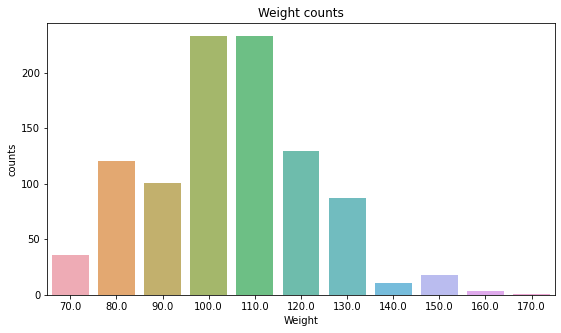

In [8]:
#将体重替换成成整十数
#b并做统计
dfcopy3=dfcopy2.copy()
dfcopy3["Weight"]=dfcopy2["Weight"].map(lambda x: x-x%10)
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(x='Weight',data=dfcopy3,alpha=0.8)
plt.xlabel('Weight')
plt.ylabel('counts')
plt.title('Weight counts')

###### 通过图表，我们发现三类肥胖人群体重超过100kg的占比超过70%,非常恐怖
###### 但这是否就能说明体重大的人群有很高几率成为肥胖人群呢？
###### 从图表结果我们可以隐约得出这个推论，但是还不完全，因为是否肥胖取决于BMI指数，也就是说与体重身高同时挂钩

In [10]:
# 所以我们进行追加检验
#为dataframe增加BMI标签
dfcopy4=df.copy()
dfcopy4['BMI'] =dfcopy4['Weight']/(dfcopy4['Height']**2)
dfcopy4.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


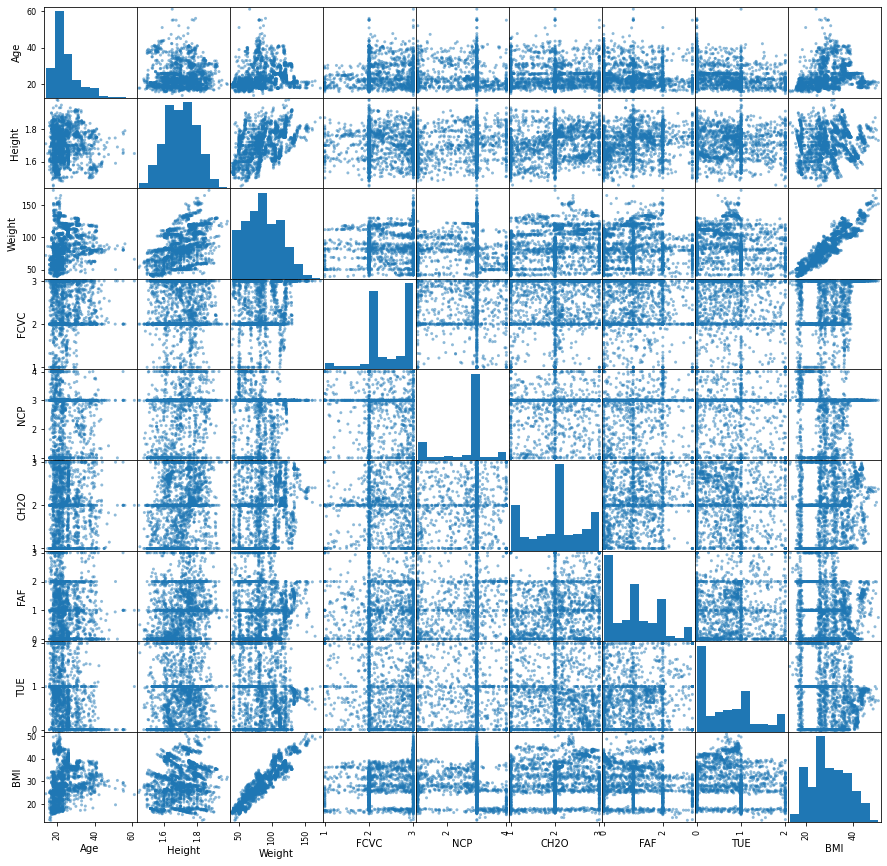

In [11]:
df4=pd.plotting.scatter_matrix(dfcopy4, figsize=(15,15))

###### 使用散点图矩阵图，可以两两发现特征之间的联系
###### 这里我们通过观察发现Weight和BMI之间存在着非常明显的相关性
###### 既然BMI同时取决于身高体重，为什么它和体重的相关性大于身高

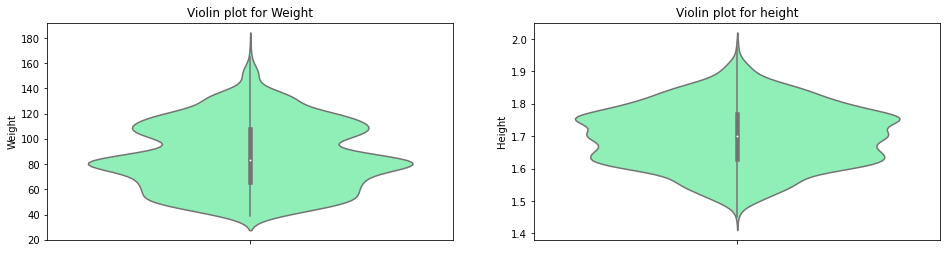

In [12]:
#于是我们分别将体重与身高的提琴图做一个展示
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.violinplot( y="Weight",data=df,palette='rainbow')
plt.xticks(rotation='vertical')
plt.title('Violin plot for Weight')
plt.subplot(122)
sns.violinplot( y="Height",data=df,palette='rainbow')
plt.xticks(rotation='vertica2')
plt.title('Violin plot for height')
plt.show()

## 推论一.
### 1.经过观察可以发线现Weight的最大值与最小值差异远大于身高,即方差更大
### 2.根据不严谨的推导,协方差公式：cij=E{[Xi−E(Xi)][Xj−E(Xj)]}，COV(Weight,NObeyesdad)>COV(Height,NObeyesdad)
### 3.至此我们推出了我们第一个比较“理所当然”的推论,即大体重人员更容易成为肥胖类型人员
### 4.深究其原因，大致是因为，虽然是否肥胖取决于身高和体重，但是对于大部分人而言，体重的变化范围大于身高的变化范围
### 所以，我们更应该好好控制我们的体重，毕竟如果放纵自己变成100kg,或许只有长到两米才能使自己成为标准身材，然而，前者是可行的，~~后者是不可行的~~，哈哈哈

In [14]:
#二.当获得第一个结论后，我们想办法探讨哪些标签因素与体重有着较为密切的关系
# 我们对SCC卡路里消耗监控，CAEC在两餐之间进食食物,SMOKE	是否吸烟,FAVC经常食用高热量食物
# family_history_with_overweight家族肥胖史,MTRANS交通工具使用
#这六个因素进行与BMI,体重相关的分析

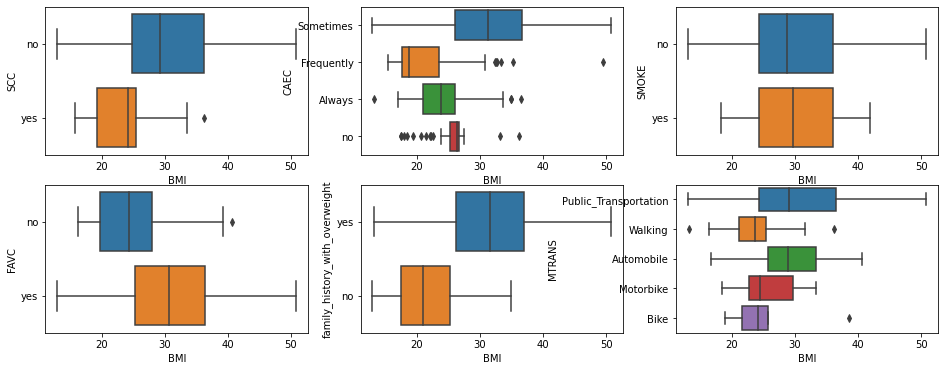

In [15]:
plt.figure(figsize=(16, 6))
plt.subplot(231)
sns.boxplot(x = 'BMI', y = 'SCC', data = dfcopy4)
plt.subplot(232)
sns.boxplot(x = 'BMI', y = 'CAEC', data = dfcopy4)
plt.subplot(233)
sns.boxplot(x = 'BMI', y = 'SMOKE', data = dfcopy4)
plt.subplot(234)
sns.boxplot(x = 'BMI', y = 'FAVC', data =dfcopy4)
plt.subplot(235)
sns.boxplot(x = 'BMI', y = 'family_history_with_overweight', data = dfcopy4)
plt.subplot(236)
sns.boxplot(x = 'BMI', y = 'MTRANS', data = dfcopy4)
plt.show()

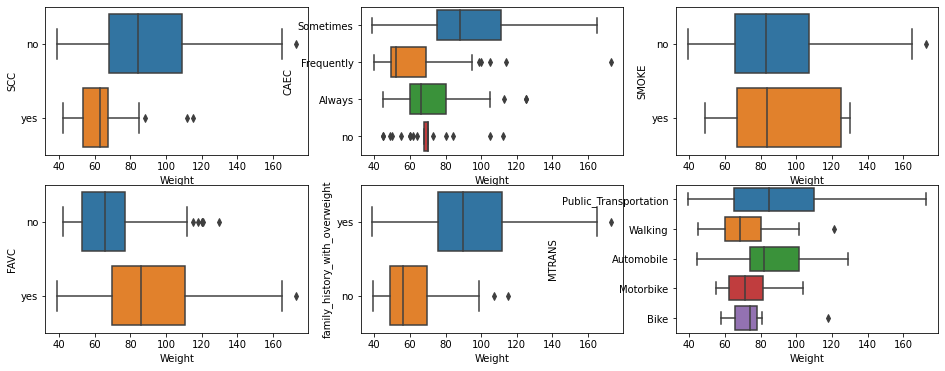

In [113]:
plt.figure(figsize=(16, 6))
plt.subplot(231)
sns.boxplot(x = 'Weight', y = 'SCC', data = df)
plt.subplot(232)
sns.boxplot(x = 'Weight', y = 'CAEC', data = df)
plt.subplot(233)
sns.boxplot(x = 'Weight', y = 'SMOKE', data = df)
plt.subplot(234)
sns.boxplot(x = 'Weight', y = 'FAVC', data = df)
plt.subplot(235)
sns.boxplot(x = 'Weight', y = 'family_history_with_overweight', data = df)
plt.subplot(236)
sns.boxplot(x = 'Weight', y = 'MTRANS', data = df)
plt.show()

## 二.通过图表分析，我们得出了以下几个显而易见也较符合认知的推论:
#### 1) 卡路里消耗量大的人员体重，BMI较小
#### 2) 在两餐间进食的人员体重，BMI大于不进食的人员
#### 3) 吸烟似乎与体重，BMI没有特别相关的联系
#### 4) 经常食用高热量食物的人员体重，BMI更大
#### 5) 家族肥胖史有家族肥胖历史的人员体重，BMI更大
#### 6) 选择走路，骑车，摩托车的人员更不容易发胖

In [17]:
#one hot编码，将离散量扩展至欧氏空间
def int_columns(df, liste_col):
    
    for col in liste_col:
        values = df[col].unique()
        #print(values)
        new_col_values = []
        for label, row in df.iterrows():
            temp = (np.where(values == row[col]))
            new_col_values.append(temp[0][0]+1)
        #print(new_col_values)    
        new_name_col = col+" - int"
        df.insert(5,new_name_col, new_col_values)
        del df[col]

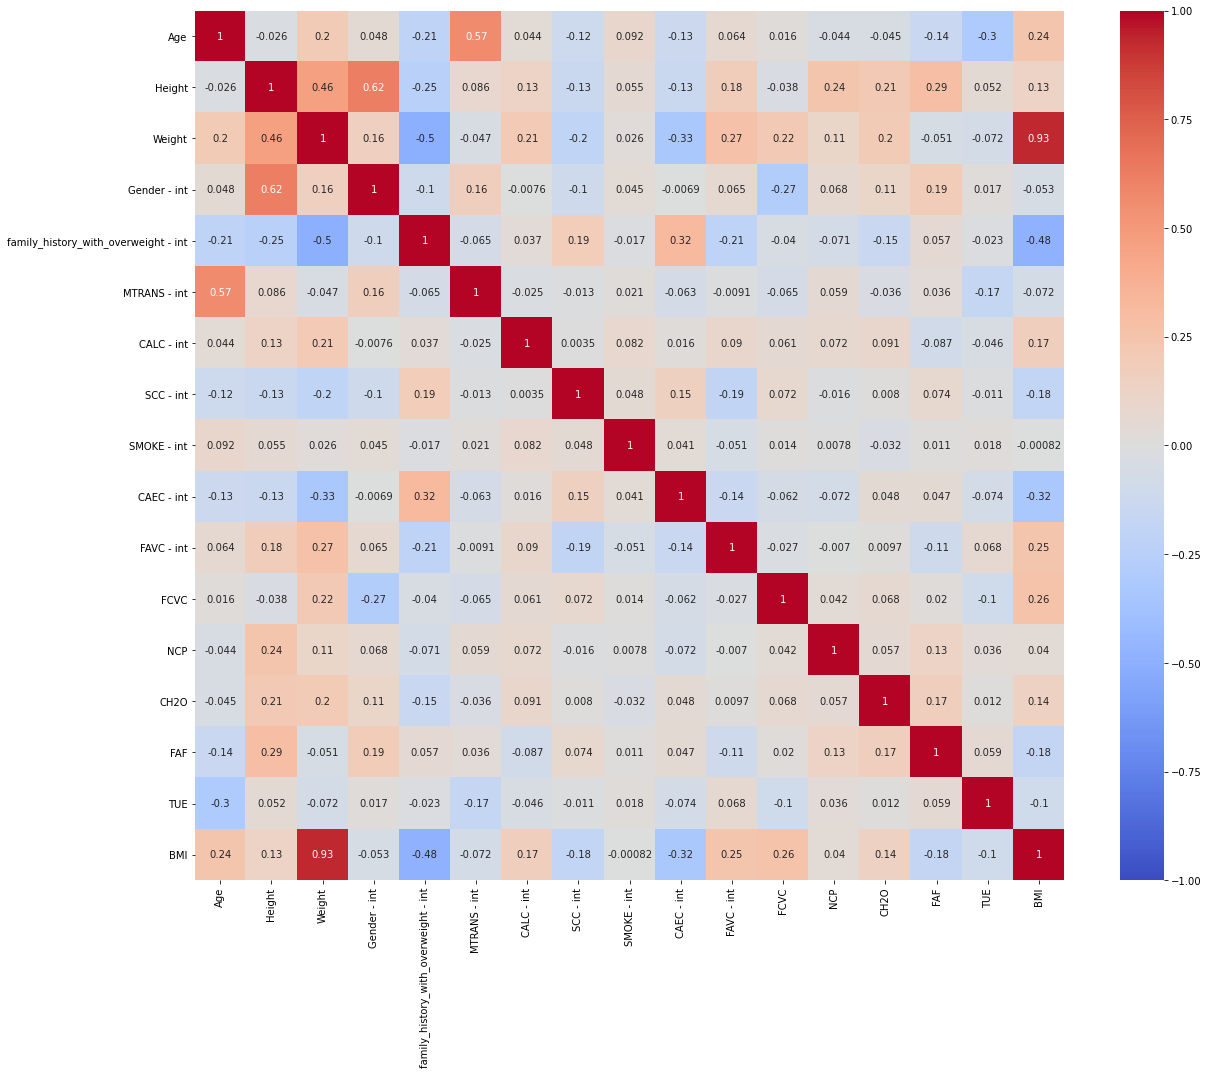

In [18]:
#来检验一下我们的推论
NewData = dfcopy4.copy()
liste_col = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']
int_columns(NewData,liste_col)
NewData.head()
plt.figure(figsize=(20,16))
sns.heatmap(NewData.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True,square=True);

#### 热力图在实际中常用于展示一组变量的相关系数矩阵，在展示列联表的数据分布上也有较大的用途，通过热力图我们可以非常直观地感受到数值大小的差异状况。heatmap的API如下所示：
#### 这个图表显示了所有数值变量之间的相关性。
#### 观察SCC,CAEC,FAVC,family，MTRANS 五个值与Weight的相关性数值绝对值
#### family，CAEC，FAVC的属性与BMI相关性较大，其中family_history_with_overweight相关性高达0.48
#### 为什么其他几个较小，猜测是因为在 onehot编码时，其他几个标签产生了较多个编码

Text(0.5, 1.0, 'Family history with overweight Vs NObeyesdad')

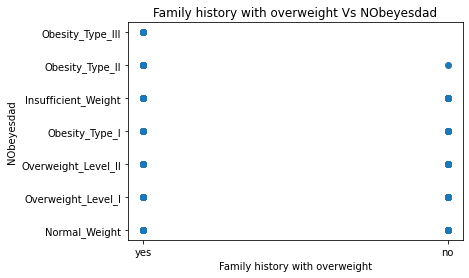

In [114]:
#继续探究家族史与肥胖的关系
plt.scatter(x='family_history_with_overweight',y='NObeyesdad',data=df)
plt.xlabel('Family history with overweight')
plt.ylabel('NObeyesdad')
plt.title('Family history with overweight')

###### 观察图表发现，没有不具有Family history with overweight的人员患有肥胖三型
###### 所以我们推测，肥胖三型更有可能是一种家族遗传疾病

<AxesSubplot:xlabel='NObeyesdad', ylabel='Age'>

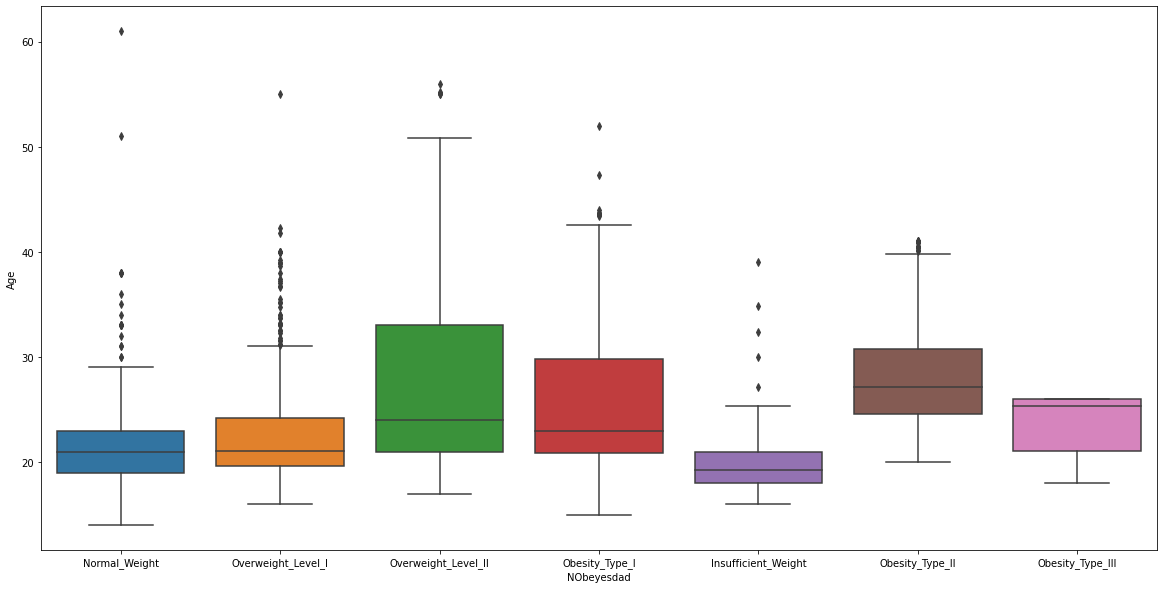

In [20]:
#三.来观察一下其他属性与肥胖的关系，以及一些其他比较有意思的推论
#1.年龄
plt.figure(figsize=(20,10))
sns.boxplot(x="NObeyesdad",y="Age",data=df)
# 从这个图表中我们可以看到，超重 II 级和肥胖 I 型人群的平均年龄比其他人群要大
# 因此，我们可以说，超重 II 级和肥胖 I 型在20岁以下的人群中不太可能引起

Text(0.5, 1.0, 'Box Plot- NObeyesdad Vs Age')

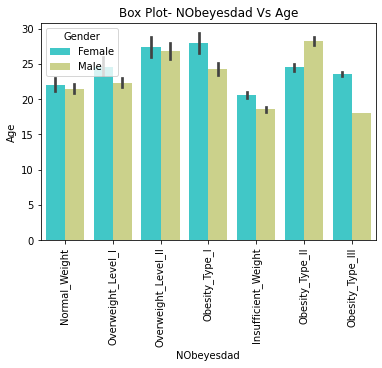

In [21]:
#2.性别
sns.barplot(x=df['NObeyesdad'],y=df['Age'],hue=df['Gender'],palette='rainbow')
plt.xticks(rotation='vertical')
plt.title("Box Plot- NObeyesdad Vs Age")
#似乎关系不大

Text(0.5, 1.0, 'consumption of high caloric food ')

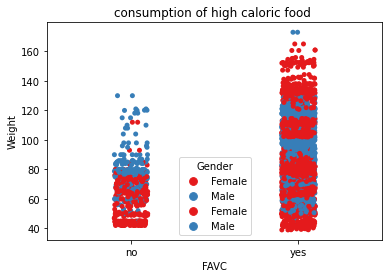

In [22]:
# 3.但是在进食上性别的差异就显现出来
sns.stripplot(x="FAVC", y="Weight", data=df,jitter=True,hue='Gender',palette='Set1')
plt.title('Stripplot for consumption of high caloric food Vs Weight')
sns.stripplot(x="FAVC", y="Weight", data=df,jitter=True,hue='Gender',palette='Set1')
plt.title('consumption of high caloric food ')
# 据观察，体重在80到120之间的人更有可能吃高热量的食物。而且摄入高热量食物的女性比男性更多
#这里我们可能可以得出一个其他推论：
#1）女性比男性更爱吃高热量食品

Text(0.5, 1.0, 'Box plot for Consumption of Alcohol & Age')

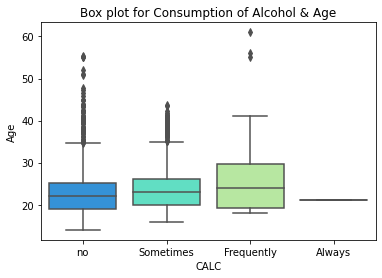

In [23]:
# 4.喝酒
sns.boxplot(x="CALC", y="Age", data=df,palette='rainbow')
plt.title('Box plot for Consumption of Alcohol & Age')
# 这个盒子图表明，经常饮酒的人年龄在20-30岁之间，年轻人更爱喝酒

Text(0.5, 1.0, 'Violin plot for transportation')

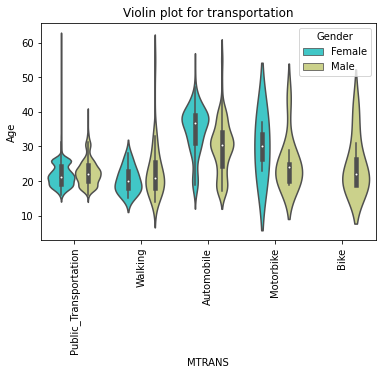

In [24]:
# 5.交通方式
sns.violinplot(x="MTRANS", y="Age",hue='Gender',data=df,palette='rainbow')
plt.xticks(rotation='vertical')
plt.title('Violin plot for transportation')
# 显示了男性和女性使用不同交通方式的分布。可以发现只有男性骑自行车

## 三.通过图表分析，我们得出了以下几推论
#### 1）肥胖 III 型可能是是一种遗传性疾病
#### 2) 超重 II 级和肥胖 I 型在20岁以下的人群中不太可能引起
#### 3）女性比男性更爱吃高热量食品
#### 4）年轻人更爱喝酒
#### 5) 只有男性骑自行车通勤  


#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 机器学习寻找模型预测肥胖程度

In [116]:
#导入模块
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [27]:
filepath='Obesity-DataSet/Obesity-DataSet.csv'
df = pd.read_csv(filepath, encoding='ISO-8859-2')
df.head(1000)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.00000,3.000000,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.00000,3.000000,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.00000,3.000000,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.00000,3.000000,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.00000,1.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Male,22.869778,1.795311,89.868784,yes,yes,1.57223,1.888067,Sometimes,no,2.000000,no,0.000000,0.552498,Sometimes,Public_Transportation,Overweight_Level_II
996,Female,22.909992,1.700038,80.000000,yes,yes,2.00000,3.000000,Sometimes,no,2.000000,no,0.973114,1.540298,no,Public_Transportation,Overweight_Level_II
997,Female,23.000000,1.668649,80.458343,yes,yes,2.00000,2.256119,Sometimes,no,1.142873,no,0.807076,1.611271,no,Public_Transportation,Overweight_Level_II
998,Male,24.679807,1.700000,84.687554,yes,yes,2.00000,3.000000,Sometimes,no,2.020424,no,0.000000,1.000000,Sometimes,Public_Transportation,Overweight_Level_II


In [117]:
#热码
data = df.copy()
liste_col = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']
int_columns(data,liste_col)
data["ob_level"]=data["NObeyesdad"].map(lambda x: 1 if x=='Insufficient_Weight' else (2 if x=='Normal_Weight' else (3 if x=='Overweight_Level_I' else (4 if x=='Overweight_Level_II' else (5 if x=='Obesity_Type_I' else (6 if x=='Obesity_Type_II' else (7 if x=='Obesity_Type_III' else 0)))))) )
del data['NObeyesdad']
data.head()

,Age,Height,Weight,Gender - int,family_history_with_overweight - int,MTRANS - int,CALC - int,SCC - int,SMOKE - int,CAEC - int,FAVC - int,FCVC,NCP,CH2O,FAF,TUE,ob_level
0,21.0,1.62,64.0,1,1,1,1,1,1,1,1,2.0,3.0,2.0,0.0,1.0,2
1,21.0,1.52,56.0,1,1,1,2,2,2,1,1,3.0,3.0,3.0,3.0,0.0,2
2,23.0,1.80,77.0,2,1,1,3,1,1,1,1,2.0,3.0,2.0,2.0,1.0,2
3,27.0,1.80,87.0,2,2,2,3,1,1,1,1,3.0,3.0,2.0,2.0,0.0,3
4,22.0,1.78,89.8,2,2,1,2,1,1,1,1,2.0,1.0,2.0,0.0,0.0,4


In [29]:
# data_y是肥胖结果
data_y = data["ob_level"].copy()
data_y.unique()

array([2, 3, 4, 5, 1, 6, 7], dtype=int64)

In [30]:
data_x = data.drop(['ob_level'], axis=1).copy()

In [31]:
# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1688, 16) (1688,) (423, 16) (423,)


In [32]:
# 数据标准化（归一化）处理是数据挖掘的一项基础工作，不同评价指标往往具有不同的量纲和量纲单位
# 这样的情况会影响到数据分析的结果，为了消除指标之间的量纲影响，需要进行数据标准化处理
# Min-Max Normalization
# 也称为离差标准化，是对原始数据的线性变换
# 当MIN和MAX为0和1时，公式等价于[0,1]缩放
MMs1 = MinMaxScaler()
MMs2 = MinMaxScaler()
x_train = MMs1.fit_transform(x_train)
x_test = MMs2.fit_transform(x_test)  

['RandomForestRegressor', 'KNeighborsRegressor', 'LinearRegression']
[0.9786153436447769, 0.8412071890962053, 0.9390903230530543]
[0.28559795841957253, 0.7782504473916145, 0.48200007830939723]


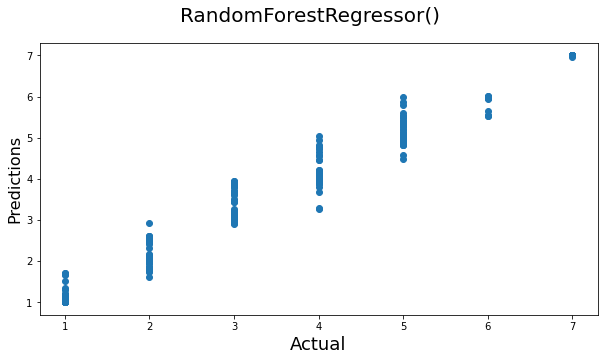

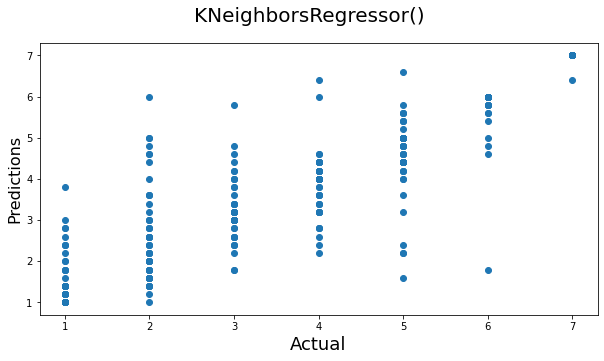

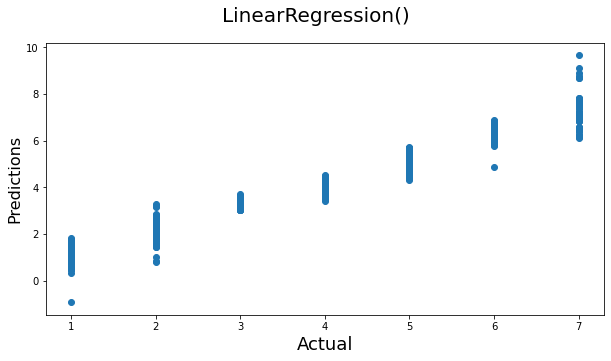

In [112]:
# 随机森林RandomForestRegressor
# 利用K近邻（回归）KNeighborsRegressor回归训练
# 线性回归算法LinearRegression
models=[RandomForestRegressor(),KNeighborsRegressor(),LinearRegression()]
all_names=['RandomForestRegressor','KNeighborsRegressor','LinearRegression']
all_rmse=[]
all_r2=[]

for i in range (len(models)):
    mod=models[i]
    mod_tuned=mod.fit(x_train,np.ravel(y_train,order='C'))#fit用训练器数据拟合分类器模型
    test_pred=mod_tuned.predict(x_test)#predict返回的是是训练后返回预测结果，是标签值
    all_rmse.append(np.sqrt(mean_squared_error(test_pred,y_test)))
    #计算均方误差回归损失
    #通常,mean_squared_error越小越好.
    all_r2.append(r2_score(y_test, test_pred))
    #R-平方（R2）
    #模型越好：r2→1
    #模型越差：r2→0
    
    fig = plt.figure(figsize=(10,5))
    plt.scatter(y_test,test_pred)
#     print(y_test,test_pred)
    fig.suptitle(mod, fontsize=20)              
    plt.xlabel('Actual', fontsize=18)                         
    plt.ylabel('Predictions', fontsize=16)
print(all_names)
print(all_r2)
print(all_rmse)

#### *  通过观测返回的误差值，以及绘图，可以发现RandomForestRegressor，LinearRegression模型正确率比较高，
#### *  其中RandomForestRegressor效果最好，具有最低的Rmse和最高的R2
#### *  我们选择RandomForestRegresso继续优化

In [34]:

estim_para = [1,5,10,15,20,25,30]
max_features = ['auto', 'sqrt']
depth_para = [1,5,10,20,30,40,50,60,70,80,90]
depth_para.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': estim_para,
               'max_features': max_features,
               'max_depth': depth_para,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rfr_model = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rfr_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 5, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1, 5, 10, 15, 20, 25,
                                                         30]},
                   random_state=42, verbose=2)

In [35]:
rf_random.best_params_

{'n_estimators': 25,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': True}

In [36]:
rfr_tuned = RandomForestRegressor(n_estimators=15,min_samples_split= 2, min_samples_leaf=1, max_features="auto", max_depth= 50, bootstrap= True)

In [37]:
rfr_tuned.fit(x_train, y_train)
pred = rfr_tuned.predict(x_train)
R2_on_train = r2_score(y_train, pred)
print(R2_on_train)
pred_test = rfr_tuned.predict(x_test)
R2_on_test = r2_score(y_test, pred_test)
print(R2_on_test)

0.9982204799923773
0.9771830886856426


In [39]:
# pickle模块实现了用于序列化和反序列化Python对象结构的二进制协议。 
#“Pickling”是将Python对象层次结构转换为字节流的过程
# “unpickling”是反向操作，从而将字节流（来自二进制文件或类似字节的对象）转换回对象层次结构。
import pickle
pickle.dump(rfr_tuned, open('rfr_model', 'wb'))
#保存模型API

In [40]:
model_test = pickle.load(open('rfr_model','rb'))
predi_pickle = model_test.predict(x_test)
print(r2_score(y_test,predi_pickle))

0.9771830886856426


#### 调用模型API测试，得到R2结果为0.977

In [128]:
#这里随机挑选测试集中一条数据进行模型特使
dftest=df.iloc[[2000]].copy()
liste_col = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']
int_columns(dftest,liste_col)
dftest["ob_level"]=dftest["NObeyesdad"].map(lambda x: 1 if x=='Insufficient_Weight' else (2 if x=='Normal_Weight' else (3 if x=='Overweight_Level_I' else (4 if x=='Overweight_Level_II' else (5 if x=='Obesity_Type_I' else (6 if x=='Obesity_Type_II' else (7 if x=='Obesity_Type_III' else 0)))))) )
dftest

,Age,Height,Weight,Gender - int,family_history_with_overweight - int,MTRANS - int,CALC - int,SCC - int,SMOKE - int,CAEC - int,FAVC - int,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,ob_level
2000,18.976968,1.759091,133.903612,1,1,1,1,1,1,1,1,3.0,3.0,2.862408,1.456933,0.742423,Obesity_Type_III,7


In [129]:
del dftest['NObeyesdad']
del dftest['ob_level']

In [130]:
dftest_pred=model_test.predict(dftest)
dftest_pred

array([5.33333333])

# 总结
## 推论一.
####     1.经过观察可以发线现Weight的最大值与最小值差异远大于身高,即方差更大
####      2.根据不严谨的推导,协方差公式：cij=E{[Xi−E(Xi)][Xj−E(Xj)]}，COV(Weight,NObeyesdad)>COV(Height,NObeyesdad)
####      3.至此我们推出了我们第一个比较“理所当然”的推论,即大体重人员更容易成为肥胖类型人员
####      4.深究其原因，大致是因为，虽然是否肥胖取决于身高和体重，但是对于大部分人而言，体重的变化范围大于身高的变化范围
####      所以，我们更应该好好控制我们的体重，毕竟如果放纵自己变成100kg,或许只有长到两米才能使自己成为标准身材，然而，前者是可行的，~~后者是不可行的~~，哈哈哈



## 推论二.通过图表分析，我们得出了以下几个显而易见也较符合认知的推论:
#### 1) 卡路里消耗量大的人员体重，BMI较小
#### 2) 在两餐间进食的人员体重，BMI大于不进食的人员
#### 3) 吸烟似乎与体重，BMI没有特别相关的联系
#### 4) 经常食用高热量食物的人员体重，BMI更大
#### 5) 家族肥胖史有家族肥胖历史的人员体重，BMI更大
#### 6) 选择走路，骑车，摩托车的人员更不容易发胖



## 三.通过图表分析，我们得出了以下几推论
#### 1）肥胖 III 型可能是是一种遗传性疾病
#### 2) 超重 II 级和肥胖 I 型在20岁以下的人群中不太可能引起
#### 3）女性比男性更爱吃高热量食品
#### 4）年轻人更爱喝酒
#### 5) 只有男性骑自行车通勤  




#### 参考书目：
* 《python数据分析》
* 《深度学习之pytorch》 

#### 参考教程：
* [sklearn中文文档]("https://www.scikitlearn.com.cn/")
* [matplotlib.org]("https://matplotlib.org/")
* [seaborn.pydata.org]("https://seaborn.pydata.org/")

#### 参考链接：
